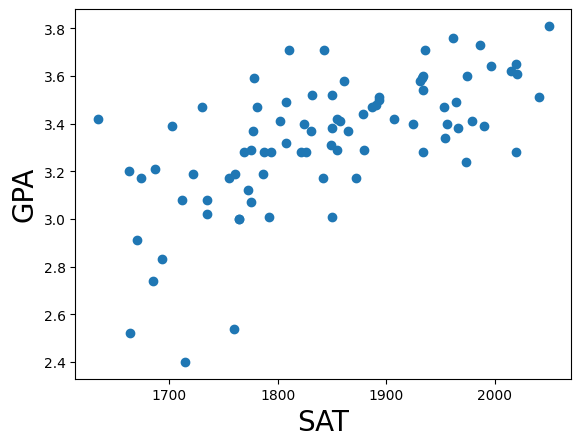

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('data/SAT_GPA.csv')

# Show the description of data
data.describe()

# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [11]:
k = 8

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D, axis=0)[:k].flatten() 

data_len = len(x)

X_train = np.array(x[:64])
Y_train = np.array(y[:64])

X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

In [12]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    Y_pred[i] = np.mean(Y_train[indices])
    print(f"{Y_pred[i]} | {Y_test[i]}")

3.3925 | 3.51
3.2750000000000004 | 3.52
3.295 | 3.52
3.3975 | 3.54
3.295 | 3.58
3.3975 | 3.58
3.3975 | 3.59
3.25875 | 3.59
3.39 | 3.6
3.3975 | 3.6
3.3875 | 3.61
3.3875 | 3.62
3.36625 | 3.64
3.3875 | 3.65
3.295 | 3.71
3.3975 | 3.71
3.30875 | 3.71
3.36625 | 3.73
3.3762499999999998 | 3.76
3.3875 | 3.81



Performance Metrics:
Mean Squared Error (MSE): 0.0814
Mean Absolute Error (MAE): 0.2712
R-squared (R²): -10.9515


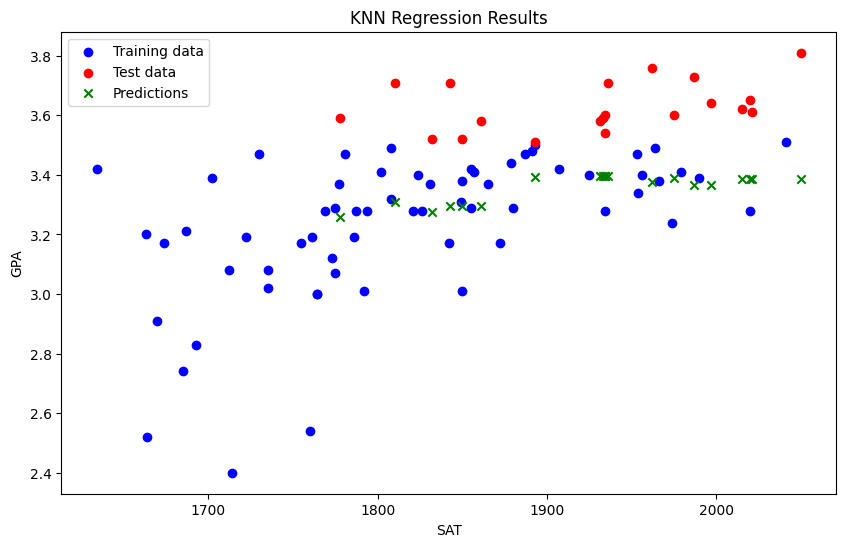

In [13]:
# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train, Y_train, color='blue', label='Training data')

# Plot test data points
plt.scatter(X_test, Y_test, color='red', label='Test data')

# Plot predicted data points (instead of a line)
plt.scatter(X_test, Y_pred, color='green', label='Predictions', marker='x')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()
plt.title('KNN Regression Results')
plt.show()